In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)

In [2]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
#pip install ISLP


In [4]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                        summarize,
                        poly)

In [5]:
Auto = load_data("Auto")

14a.

In [6]:
mpg01=(Auto['mpg']>Auto['mpg'].median()).astype(int)
mpg01

,mpg
name,
chevrolet chevelle malibu,0
buick skylark 320,0
plymouth satellite,0
amc rebel sst,0
ford torino,0
...,...
ford mustang gl,1
vw pickup,1
dodge rampage,1


In [7]:
Auto['mpg01'] = mpg01

14b.

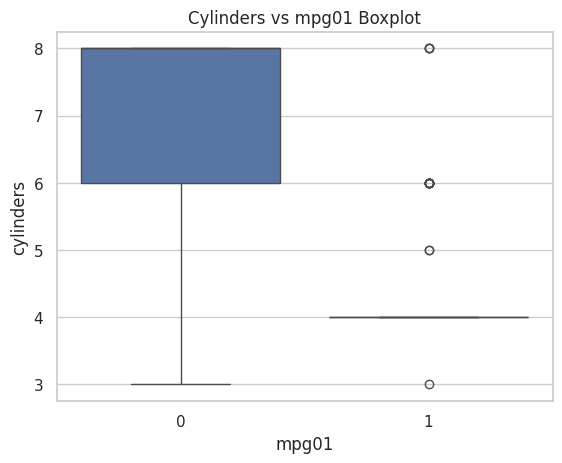

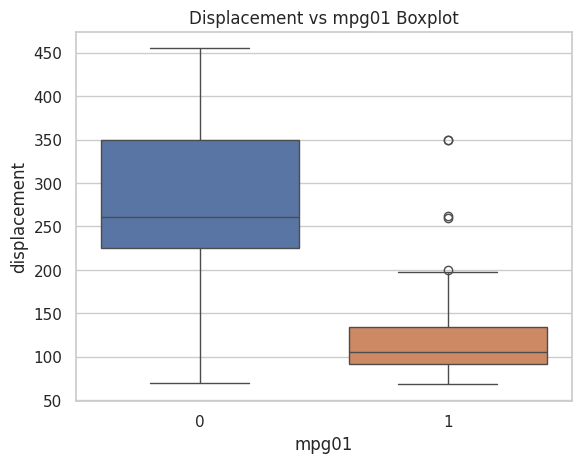

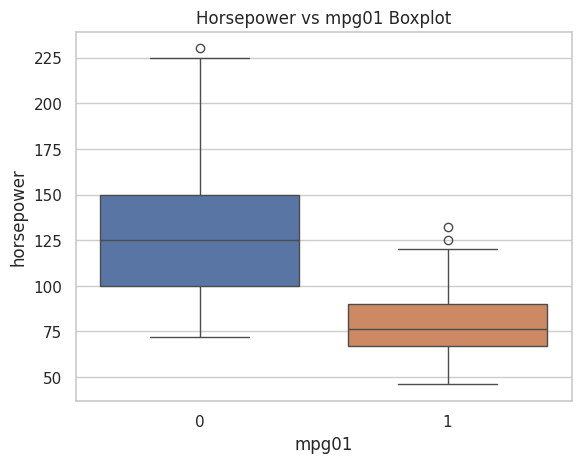

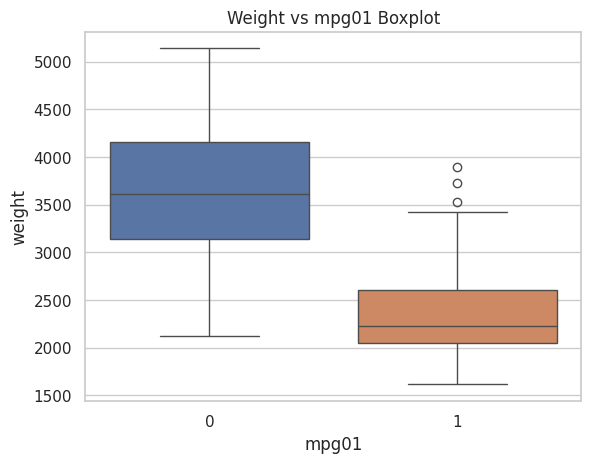

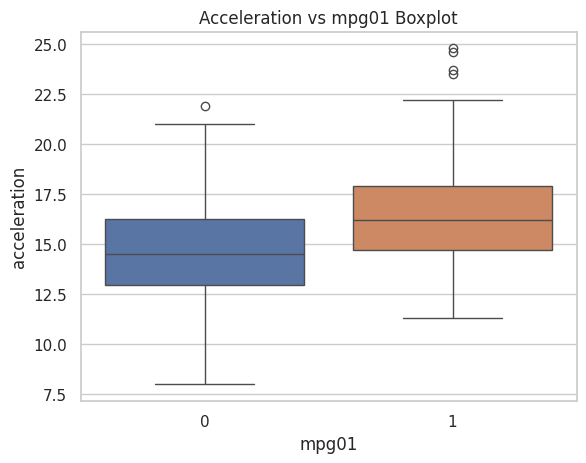

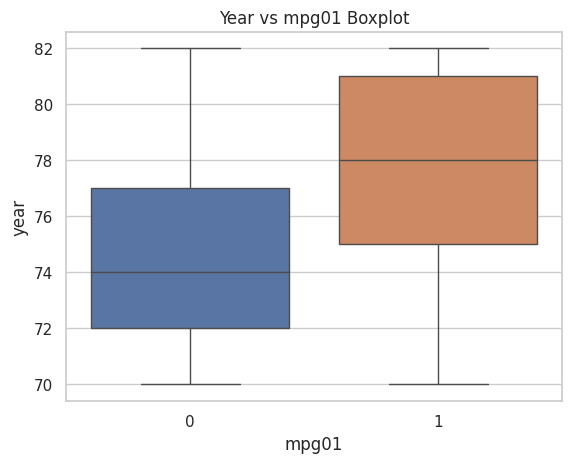

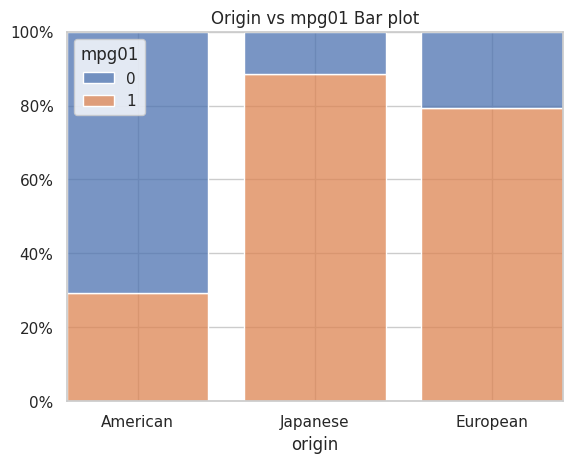

In [8]:
#Originally generated by CHATgpt
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set(style="whitegrid")

# Convert 'origin' to categorical with labels
Auto['origin'] = Auto['origin'].replace({1: 'American', 2: 'European', 3: 'Japanese'})

# Plot 1: Cylinders vs mpg01 Boxplot
g1 = sns.boxplot(data=Auto, x='mpg01', y='cylinders', hue='mpg01')
g1.legend_.remove()
plt.title('Cylinders vs mpg01 Boxplot')
plt.show()

# Plot 2: Displacement vs mpg01 Boxplot
g2 = sns.boxplot(data=Auto, x='mpg01', y='displacement', hue='mpg01')
g2.legend_.remove()
plt.title('Displacement vs mpg01 Boxplot')
plt.show()

# Plot 3: Horsepower vs mpg01 Boxplot
g3 = sns.boxplot(data=Auto, x='mpg01', y='horsepower', hue='mpg01')
g3.legend_.remove()
plt.title('Horsepower vs mpg01 Boxplot')
plt.show()

# Plot 4: Weight vs mpg01 Boxplot
g4 = sns.boxplot(data=Auto, x='mpg01', y='weight', hue='mpg01')
g4.legend_.remove()
plt.title('Weight vs mpg01 Boxplot')
plt.show()

# Plot 5: Acceleration vs mpg01 Boxplot
g5 = sns.boxplot(data=Auto, x='mpg01', y='acceleration', hue='mpg01')
g5.legend_.remove()
plt.title('Acceleration vs mpg01 Boxplot')
plt.show()

# Plot 6: Year vs mpg01 - Boxplot
g6 = sns.boxplot(data=Auto, x='mpg01', y='year', hue='mpg01')
g6.legend_.remove()
plt.title('Year vs mpg01 Boxplot')
plt.show()

# Plot 7: Origin vs mpg01 Bar plot
g7 = sns.histplot(data=Auto, x='origin', hue='mpg01', multiple='fill', shrink=0.8)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.ylabel('')
plt.title('Origin vs mpg01 Bar plot')
plt.show()


Explanation: It looks like all of the other features are useful in predicting mpg01, but I would say cylinders, displacement, weight, and horsepower are more powerful than the others.

14c.

In [9]:
np.random.seed(123)
train, test = train_test_split(Auto, test_size=0.5, random_state=123)

14d.

In [10]:
# Prepare features and mpg01
X_train = train[['cylinders', 'displacement', 'weight', 'horsepower']]
y_train = train['mpg01']
X_test = test[['cylinders', 'displacement', 'weight', 'horsepower']]

In [11]:
lda = LDA(store_covariance=True)
lda.fit(X_train, y_train)
predicted_lda = lda.predict(X_test)

# Calculate test error
print(np.mean(predicted_lda != test['mpg01']))

0.10204081632653061


14e.

In [12]:
qda = QDA(store_covariance=True)
qda.fit(train[['cylinders', 'displacement', 'weight', 'horsepower']], train['mpg01'])
predicted_qda = qda.predict(X_test)
print(np.mean(predicted_qda != test['mpg01']))

0.09693877551020408


14f.

In [13]:
logit = LogisticRegression(C=1e10, solver='liblinear')
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)
print(np.mean(logit_pred != test['mpg01']))

0.12755102040816327


14g.

In [14]:
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred=NB.predict(X_test)
print(np.mean(NB_pred != test['mpg01']))

0.10204081632653061


14h.

In [15]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(np.mean(knn_pred != test['mpg01']))

0.11734693877551021


The best value of k I could find was 7 since the error starts inccreasing after k=7.\
Test error for k=1: 0.16326530612244897\
Test error for k=8: 0.12244897959183673